In [1]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 25.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=bed002889e5913160a454832ce2d1411a904e5630d8aa6aee531a73e15461bf1
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=14ddb0fa6c30801591695e41a4020ecbd9de578c3f4ca6e4d3c38aa205a56c2e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


# **a) Dimensionality Reduction Techniques on Text Data**

Import libraries and set plot styles

In [2]:
%matplotlib inline

from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from time import time
from matplotlib.ticker import NullFormatter
import umap.umap_ as umap

plt.style.use('ggplot')

In [3]:
#To suppress unnecesary future warings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Get and prepare data

In [4]:
diabetes = load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
X = df.values #feature matrix

In [5]:
df.shape

(442, 10)

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


The full dataset contains 10 columns and 442
 observations

# **1) PCA - Principal Component Analysis**

Standardize Features


In [7]:
#create the object
scaler =  StandardScaler()

#calculate the mean and standard deviation
scaler.fit(X)

#transform the values
X_scaled = scaler.transform(X)

Choose the right number of dimensions (k)

First, apply PCA to all 10 features to check how well PCA captures the variance of the data.

In [8]:
pca_10 = PCA(n_components = 10, random_state = 2020)
pca_10.fit(X_scaled)
X_pca_10 = pca_10.transform(X_scaled)

In [9]:
print('Variance of all 10 features = ', sum(pca_10.explained_variance_ratio_*100))

Variance of all 10 features =  100.0


Text(0, 0.5, 'Explained Variance')

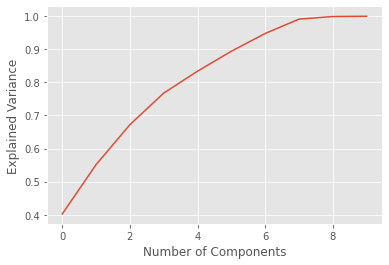

In [10]:
plt.plot(np.cumsum(pca_10.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [11]:
print('Variance explained by the First PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[4])
print('Variance explained for 10 PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[9])

Variance explained by the First PCs =  40.24214175678765
Variance explained by the First 2 PCs =  55.16532410893229
Variance explained by the First 5 PCs =  83.40156689459845
Variance explained for 10 PCs =  100.0


Apply PCA by setting n_components = 2

In [12]:
pca_2 = PCA(n_components = 2, random_state = 2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

Create a 2D scatter plot with 2 principal components

Text(0, 0.5, 'Second Principal Component')

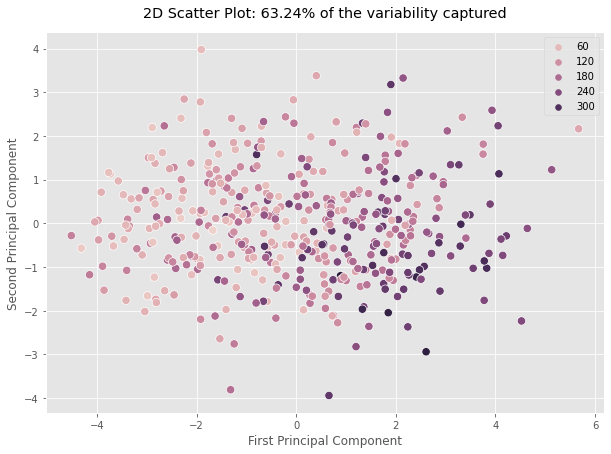

In [13]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = X_pca_2[:, 0], y = X_pca_2[:, 1], s = 70, hue = diabetes.target)

plt.title('2D Scatter Plot: 63.24% of the variability captured', pad = 15)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# **2) SVD - Single Value Decomposition**

In [14]:
#Fitting the data in SVD class with 2 features
trun_svd =  TruncatedSVD(n_components = 9)
svd_9 = trun_svd.fit_transform(X)

In [15]:
 #Printing the transformed matrix
print("Transformed Matrix:")
print(svd_9[:3])

Transformed Matrix:
[[ 0.02793062 -0.09260116  0.02802696 -0.00393895 -0.01220663 -0.04809855
  -0.00855256  0.03602797 -0.00861296]
 [-0.13468605  0.06526341  0.00132778 -0.02235559 -0.00681271 -0.04818421
   0.01067428 -0.00896163  0.0240261 ]
 [ 0.01294474 -0.07776417  0.0351635  -0.03764663 -0.05535734 -0.05293076
  -0.02199441  0.0401086  -0.00120629]]


In [16]:
print('Variance of all 10 features = ', sum(trun_svd.explained_variance_ratio_*100))

Variance of all 10 features =  99.9143947009898


Text(0, 0.5, 'Explained Variance')

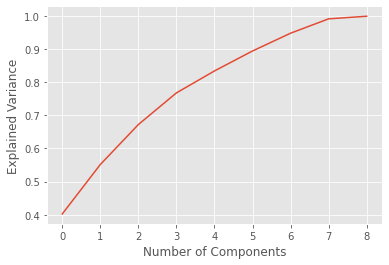

In [17]:
plt.plot(np.cumsum(trun_svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [18]:
print('Variance explained by the First PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[4])
print('Variance explained for 10 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[8])

Variance explained by the First PCs =  40.24214175678739
Variance explained by the First 2 PCs =  55.1653241089316
Variance explained by the First 5 PCs =  83.40156689459769
Variance explained for 10 PCs =  99.9143947009898


Apply SVD by setting n_components = 2

In [19]:
trun_svd =  TruncatedSVD()
A_transformed = trun_svd.fit_transform(df)

In [20]:
print("Transformed Matrix:")
print(A_transformed)

Transformed Matrix:
[[ 2.79306207e-02 -9.26011612e-02]
 [-1.34686052e-01  6.52634060e-02]
 [ 1.29447396e-02 -7.77641691e-02]
 [ 2.34543980e-03  1.81819367e-02]
 [-3.59806910e-02  3.86213572e-02]
 [-1.88660280e-01 -1.81251413e-02]
 [-9.48347610e-02 -3.83155499e-02]
 [ 9.87389258e-02  8.69453424e-02]
 [ 2.86833351e-02 -4.19169143e-02]
 [-1.00910711e-02 -2.34450670e-02]
 [-1.83419418e-01 -7.28738089e-02]
 [ 1.88796730e-02 -3.00873701e-02]
 [-7.59323171e-02  4.66838722e-02]
 [ 1.51473512e-02 -3.09692487e-02]
 [-8.01694940e-02  8.64707740e-02]
 [ 1.40488092e-01  4.51897240e-02]
 [ 7.58600302e-03  4.33946961e-02]
 [ 1.08839198e-01 -7.06819254e-03]
 [-5.49947993e-02 -2.03725705e-02]
 [-8.42651351e-02  4.41806793e-02]
 [-9.55955468e-02 -1.37941404e-02]
 [-9.18719735e-02 -3.95423697e-02]
 [-7.97268029e-02  3.42316116e-02]
 [ 1.79486384e-01 -8.39222736e-02]
 [-6.13394313e-02 -1.18652407e-02]
 [ 3.92363820e-03 -5.10828245e-02]
 [-1.84828537e-01 -4.67873287e-02]
 [-4.96967732e-02 -2.63117973e-02]


In [21]:
print('Variance of all 10 features = ', sum(trun_svd.explained_variance_ratio_*100))

Variance of all 10 features =  55.16532410893154


# **3) LLE - Locally Linear Embedding**

In [22]:
embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(X)
X_transformed.shape

(442, 2)

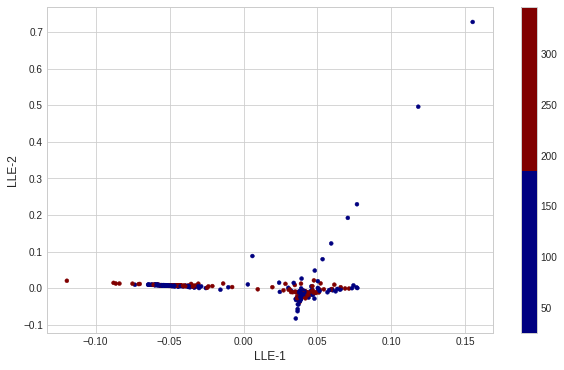

In [23]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

# **4) tSNE - t Distributed Stochastic Neighbor Embedding**

In [24]:
X_embedded = TSNE().fit_transform(df)
X_embedded.shape

(442, 2)

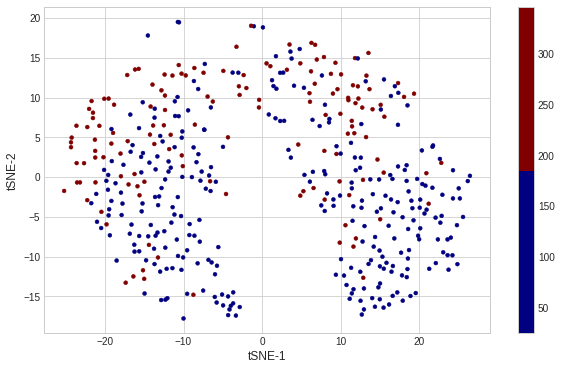

In [25]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

# **5) ISOMAP - Isometric Mapping**

In [26]:
embedding = Isomap()
X_transformed = embedding.fit_transform(X)
X_transformed.shape

(442, 2)

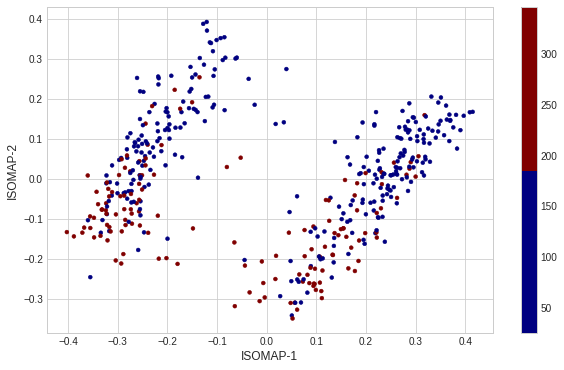

In [27]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

# **6) UMAP**

In [28]:
trans = umap.UMAP(n_neighbors=5).fit(df)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


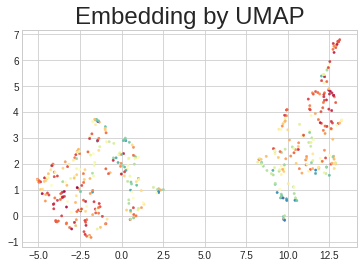

In [29]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = diabetes.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24);

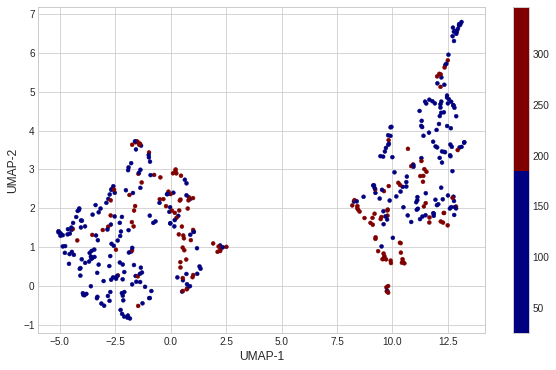

In [30]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

# **Plotting all Methods** (For side by side comparison)

LLE: 0.12 sec
t-SNE: 2.9 sec
UMAP: 4.3 sec
ISOMAP: 0.12 sec
SVD: 0.009 sec
PCA: 0.0031 sec


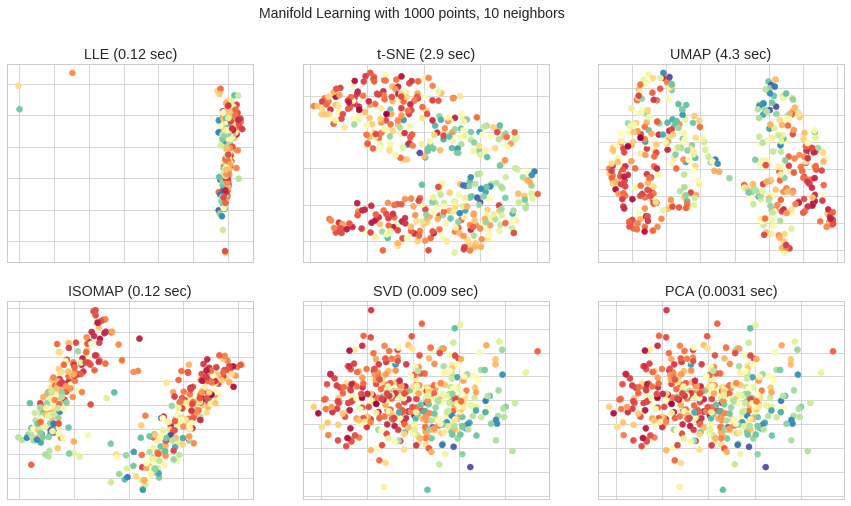

In [31]:
n_neighbors = 10
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

method_keys = ["LLE","t-SNE","UMAP","ISOMAP","SVD","PCA"]
methods = {}
methods['LLE'] = LocallyLinearEmbedding(n_neighbors=n_neighbors)
methods['t-SNE'] = TSNE(init='pca')
methods['UMAP'] = umap.UMAP()
methods['ISOMAP'] = Isomap()
methods['SVD'] = TruncatedSVD()
methods['PCA']=PCA()
# Plotting the results
for i,method in enumerate(method_keys):
    t0 = time()
    Y = methods[method].fit_transform(df)
    t1 = time()
    time_elapsed = t1-t0
    print("%s: %.2g sec" % (method, time_elapsed))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=diabetes.target, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (method, time_elapsed))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()